# Importing libraries

In [1]:
# Data loading
import pandas as pd

# Data manipulation
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Regression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Clustering
from sklearn.cluster import KMeans

# Loading the dataset

* Dataset Link: [Programming languages](https://github.com/devanshu0602/Predictive-Analytics-21BCE0597/blob/main/programming_languages.csv)

In [2]:
df = pd.read_csv('/content/programming_languages.csv')
df.head()

,name,year,quarter,prs_count,issues_count
0,Ruby,2011,3,632,965.0
1,PHP,2011,3,484,560.0
2,Python,2011,3,423,619.0
3,JavaScript,2011,3,367,694.0
4,Java,2011,3,216,420.0


# Data preprocessing

## Handling null values

In [3]:
print("\nColumn-wise null values:", end="\n\n")
df.isnull().sum()


Column-wise null values:



,0
name,0
year,0
quarter,0
prs_count,0
issues_count,553


In [4]:
df.dropna(inplace=True)
print("\nRows with null values have been dropped.\n")


Rows with null values have been dropped.



In [5]:
print("\nTotal null values:", end="\n\n")
df.isnull().sum().sum()


Total null values:



0

## Encoding

In [6]:
encoder = LabelEncoder()
df['name'] = encoder.fit_transform(df['name'])

In [7]:
df.head()

,name,year,quarter,prs_count,issues_count
0,102,2011,3,632,965.0
1,78,2011,3,484,560.0
2,92,2011,3,423,619.0
3,53,2011,3,367,694.0
4,52,2011,3,216,420.0


# Data visualization

## Correlation heatmap

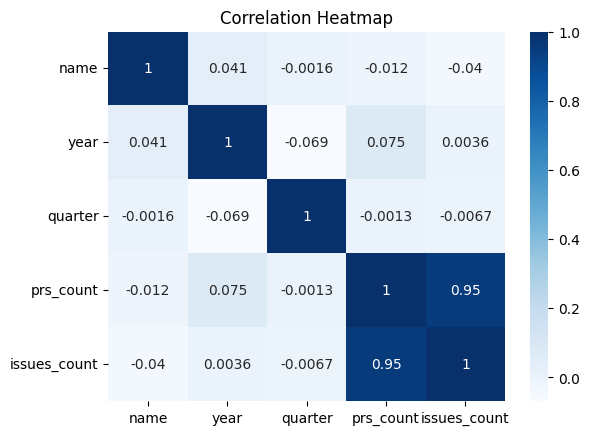

In [8]:
sns.heatmap(df.corr(), annot=True, cmap='Blues')

plt.title('Correlation Heatmap')

plt.show()

## Yearly Total Issues Count

In [9]:
yearly_issues = df.groupby('year')['issues_count'].sum().reset_index()

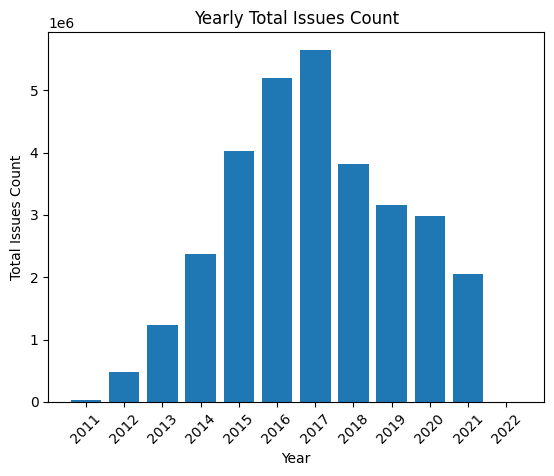

In [10]:
plt.bar(yearly_issues['year'], yearly_issues['issues_count'])

plt.xticks(ticks = [*range(2011, 2023)], rotation = 45)
plt.xlabel('Year')
plt.ylabel('Total Issues Count')
plt.title('Yearly Total Issues Count')

plt.show()

## Yearly Total PRs Count

In [11]:
yearly_prs = df.groupby('year')['prs_count'].sum().reset_index()

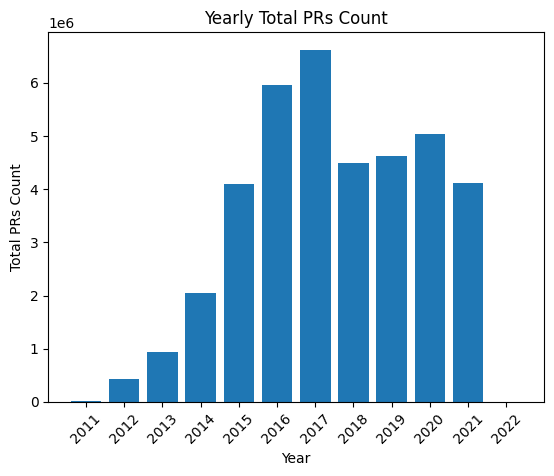

In [12]:
plt.bar(yearly_prs['year'], yearly_prs['prs_count'])

plt.xticks(ticks = [*range(2011, 2023)], rotation = 45)
plt.xlabel('Year')
plt.ylabel('Total PRs Count')
plt.title('Yearly Total PRs Count')

plt.show()

## Quarterly Total Issues Count

In [13]:
quarterly_issues = df.groupby('quarter')['issues_count'].sum().reset_index()

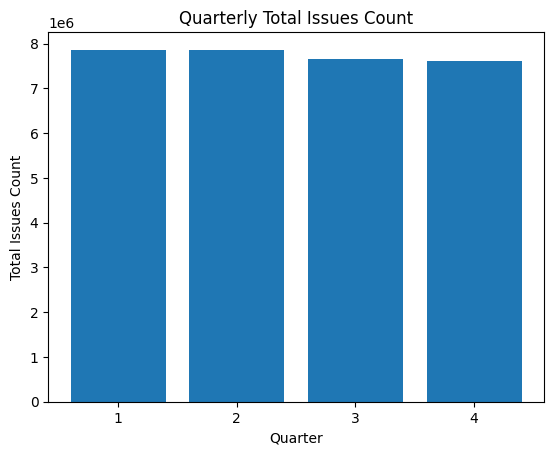

In [14]:
plt.bar(quarterly_issues['quarter'], quarterly_issues['issues_count'])

plt.xticks(ticks = [1, 2, 3, 4])
plt.xlabel('Quarter')
plt.ylabel('Total Issues Count')
plt.title('Quarterly Total Issues Count')

plt.show()

## Quarterly Total PRs Count

In [15]:
quarterly_prs = df.groupby('quarter')['prs_count'].sum().reset_index()

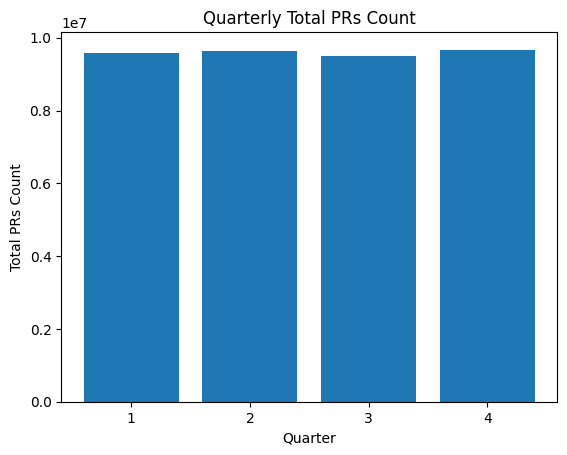

In [16]:
plt.bar(quarterly_prs['quarter'], quarterly_prs['prs_count'])

plt.xticks(ticks = [1, 2, 3, 4])
plt.xlabel('Quarter')
plt.ylabel('Total PRs Count')
plt.title('Quarterly Total PRs Count')

plt.show()

## Language-wise Total Issues Count

In [17]:
df['name'] = encoder.inverse_transform(df['name'])

In [18]:
language_wise_issues = df.groupby('name')['issues_count'].sum().reset_index()

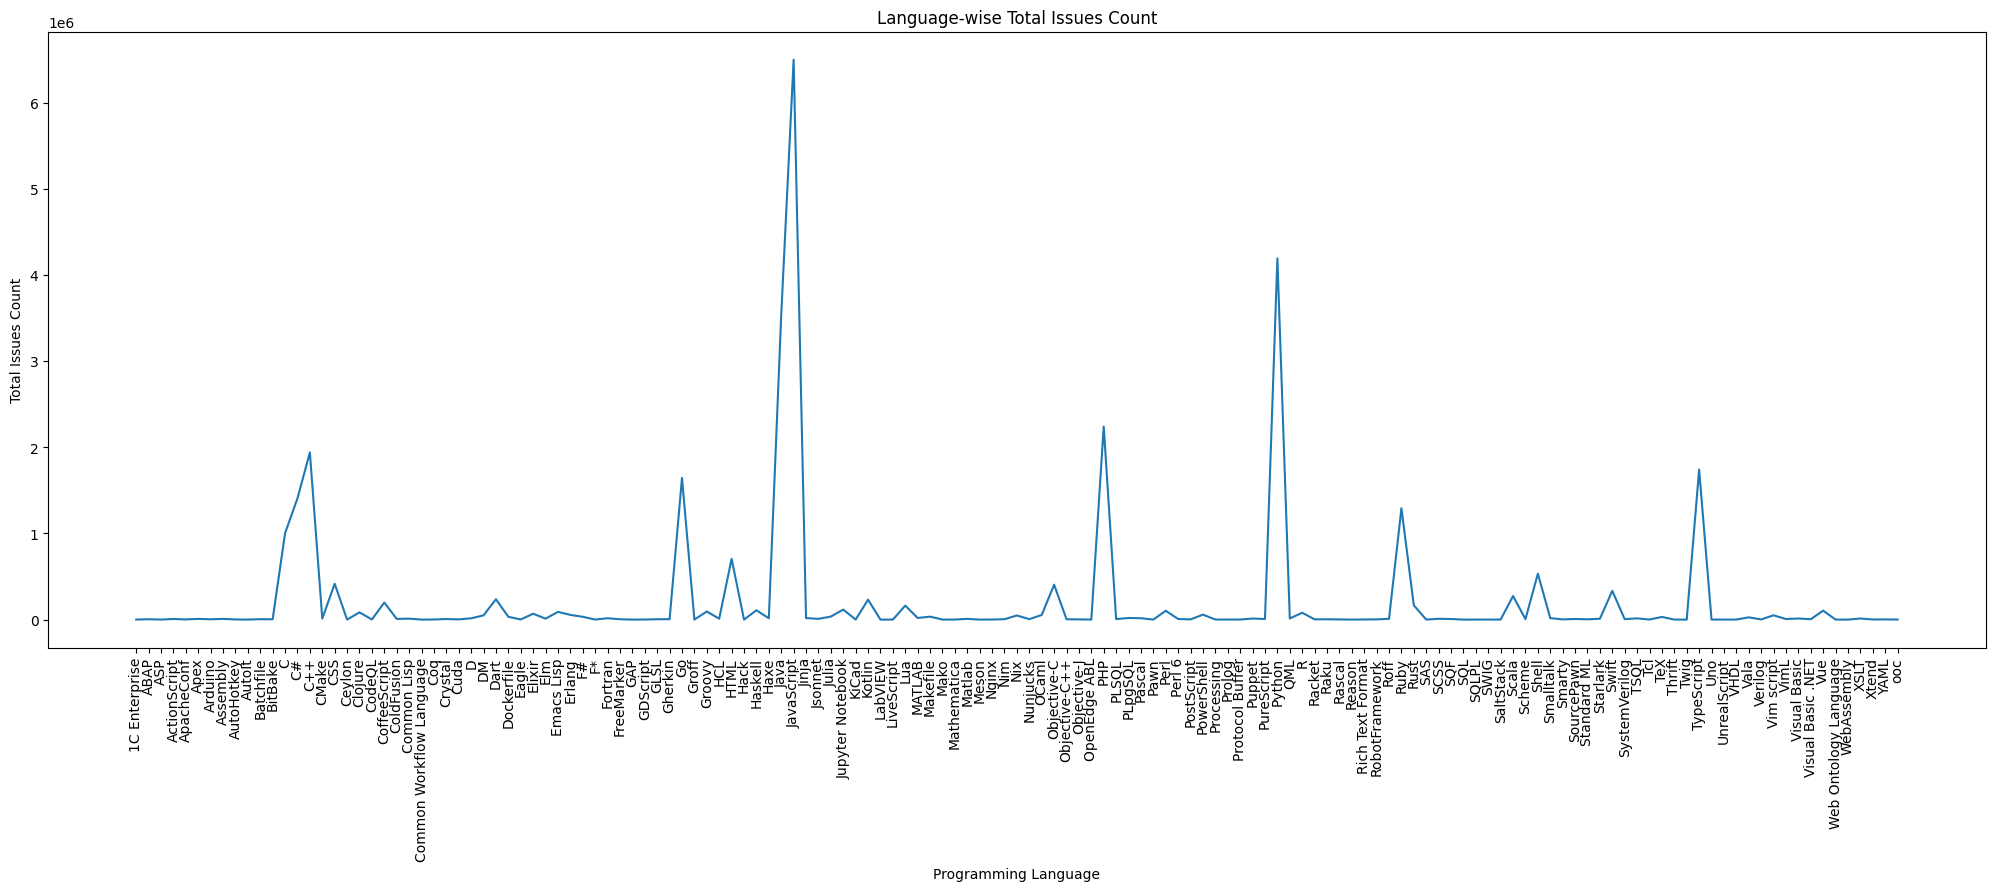

In [19]:
plt.figure(figsize = [25, 8])

plt.plot(language_wise_issues['name'], language_wise_issues['issues_count'])

plt.xticks(rotation = 90)
plt.xlabel('Programming Language')
plt.ylabel('Total Issues Count')
plt.title('Language-wise Total Issues Count')

plt.show()

## Language-wise Total PRs Count

In [20]:
language_wise_prs = df.groupby('name')['prs_count'].sum().reset_index()

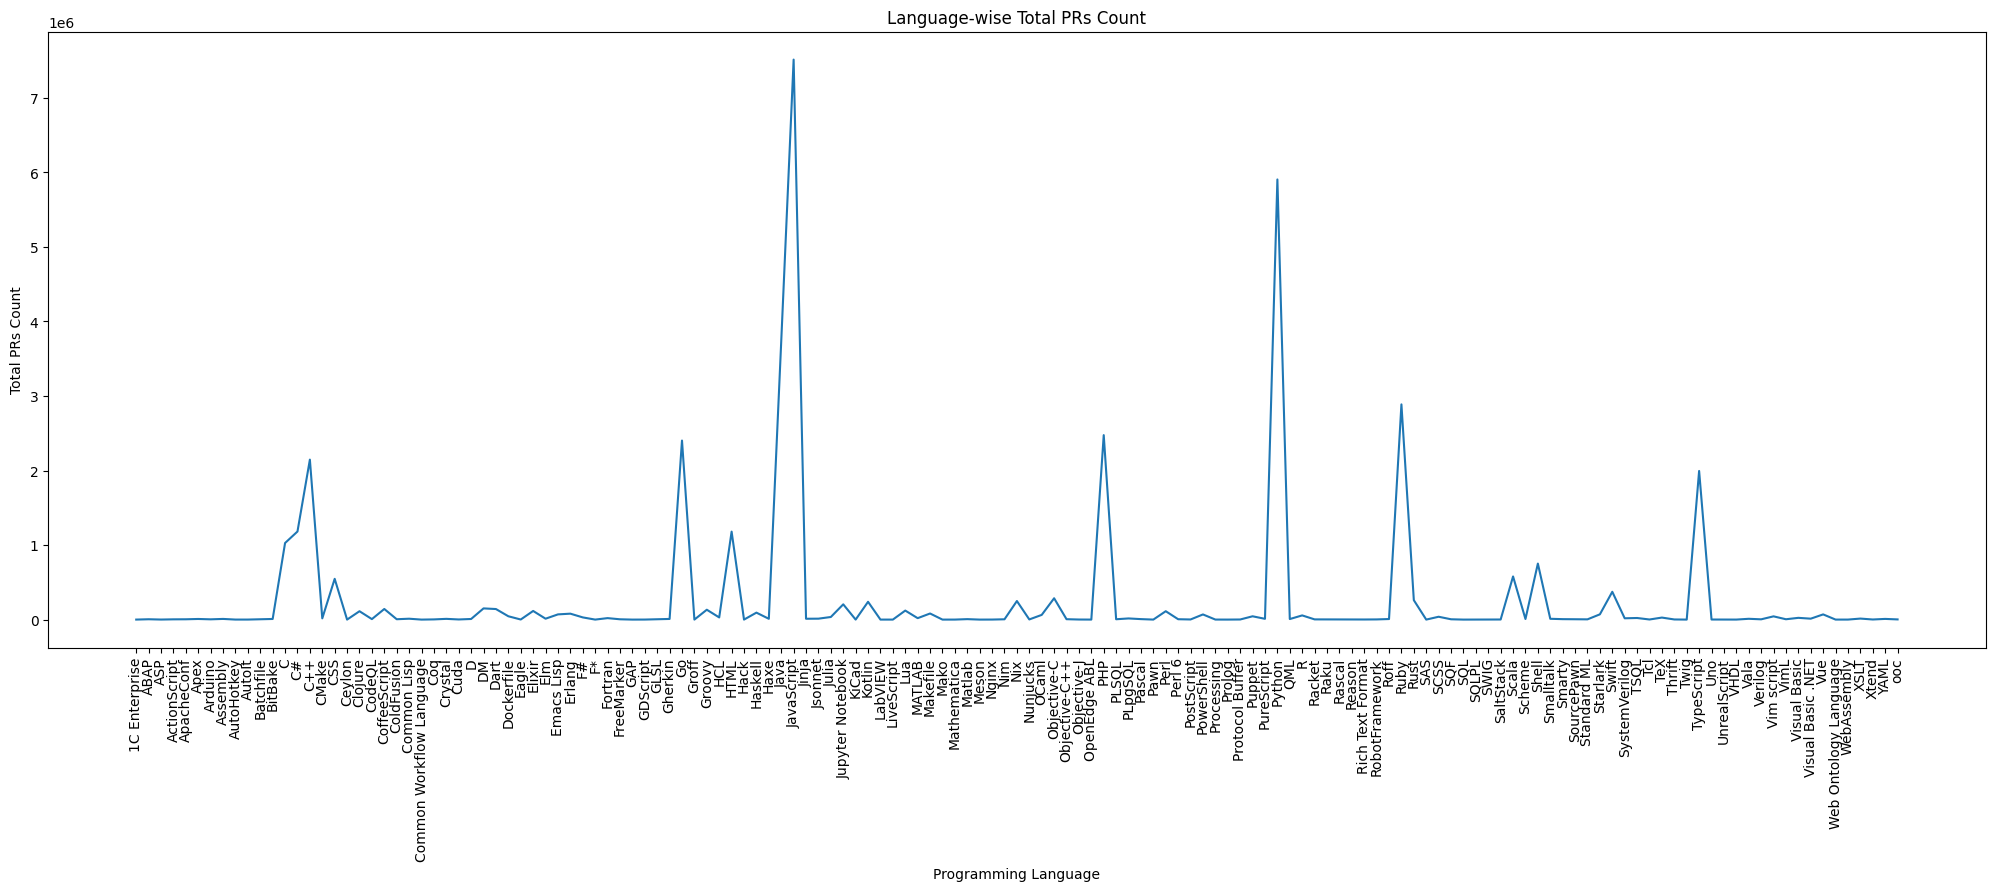

In [21]:
plt.figure(figsize = [25, 8])

plt.plot(language_wise_prs['name'], language_wise_prs['prs_count'])

plt.xticks(rotation = 90)
plt.xlabel('Programming Language')
plt.ylabel('Total PRs Count')
plt.title('Language-wise Total PRs Count')

plt.show()

# Regression

In [22]:
df_regression = df.copy()

In [23]:
df_regression['name'] = encoder.fit_transform(df_regression['name'])

In [24]:
df_regression.head()

,name,year,quarter,prs_count,issues_count
0,102,2011,3,632,965.0
1,78,2011,3,484,560.0
2,92,2011,3,423,619.0
3,53,2011,3,367,694.0
4,52,2011,3,216,420.0


In [25]:
df_regression.describe()

,name,year,quarter,prs_count,issues_count
count,2909.000000,2909.000000,2909.000000,2909.000000,2909.000000
mean,67.354761,2016.956342,2.506016,13195.761086,10656.149192
std,39.677681,2.546234,1.118056,37487.027290,30646.587848
min,0.000000,2011.000000,1.000000,100.000000,100.000000
25%,33.000000,2015.000000,2.000000,314.000000,307.000000
50%,63.000000,2017.000000,3.000000,943.000000,750.000000
75%,102.000000,2019.000000,4.000000,4813.000000,4057.000000
max,142.000000,2022.000000,4.000000,397530.000000,341480.000000


## X-y split

In [26]:
y_regression = df_regression['issues_count']
x_regression = df_regression.drop('issues_count', axis=1)

## Train test split

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x_regression,
                                                    y_regression,
                                                    test_size = 0.25,
                                                    random_state = 42)

In [28]:
x_train.shape, y_train.shape

((2181, 4), (2181,))

In [29]:
x_test.shape, y_test.shape

((728, 4), (728,))

## Model Building

### Linear Regression

In [30]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(x_train, y_train)

linear_regression_pred = linear_regression_model.predict(x_test)

In [31]:
linear_regression_rmse = np.sqrt(mean_squared_error(y_test, linear_regression_pred))
linear_regression_r2 = r2_score(y_test, linear_regression_pred)

print(f"\nRMSE = {100 * linear_regression_rmse:.4f}")
print(f"R2 Score = {100 * linear_regression_r2:.4f}%\n\n")


RMSE = 918533.8853
R2 Score = 92.0857%




### Decision Tree Regression

In [32]:
dt_regression_model = DecisionTreeRegressor()
dt_regression_model.fit(x_train, y_train)

dt_regression_pred = dt_regression_model.predict(x_test)

In [33]:
dt_regression_rmse = np.sqrt(mean_squared_error(y_test, dt_regression_pred))
dt_regression_r2 = r2_score(y_test, dt_regression_pred)

print(f"\nRMSE = {100 * dt_regression_rmse:.4f}")
print(f"R2 Score = {100 * dt_regression_r2:.4f}%\n\n")


RMSE = 533723.0812
R2 Score = 97.3279%




## Performance comparison

In [34]:
regression_metrics = pd.DataFrame({
    'Model': ['Linear', 'Decision Tree'],
    'RMSE': [linear_regression_rmse, dt_regression_rmse],
    'R2 Score': [linear_regression_r2, dt_regression_r2]
})

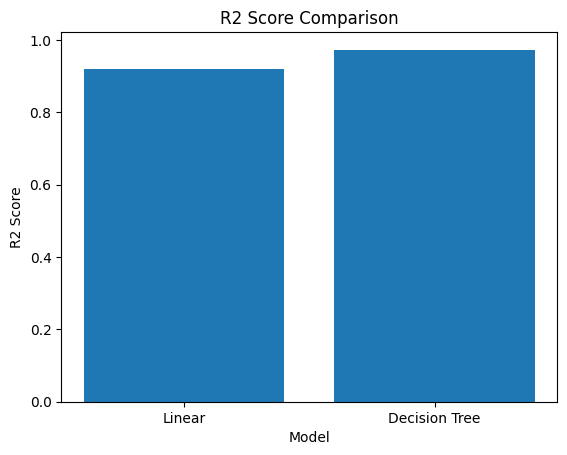

In [35]:
plt.bar(regression_metrics['Model'], regression_metrics['R2 Score'])

plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.title('R2 Score Comparison')

plt.show()

# Classification

In [36]:
df_classification = df.copy()

In [37]:
df_classification['name'] = encoder.fit_transform(df_classification['name'])

In [38]:
df_classification.head()

,name,year,quarter,prs_count,issues_count
0,102,2011,3,632,965.0
1,78,2011,3,484,560.0
2,92,2011,3,423,619.0
3,53,2011,3,367,694.0
4,52,2011,3,216,420.0


In [39]:
bins = [-float('inf'), 400, 4000, float('inf')]

df_classification['issues_count'] = pd.cut(df_classification['issues_count'],
                                           bins = bins,
                                           labels = ['Low', 'Medium', 'High'])

In [40]:
df_classification['issues_count'].value_counts()

,count
issues_count,
Medium,1218
Low,954
High,737


## X-y split

In [41]:
y_classification = df_classification['issues_count']
x_classification = df_classification.drop('issues_count', axis=1)

## Train test split

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x_classification,
                                                    y_classification,
                                                    test_size = 0.25,
                                                    random_state = 42)

In [43]:
x_train.shape, y_train.shape

((2181, 4), (2181,))

In [44]:
x_test.shape, y_test.shape

((728, 4), (728,))

## Model Building

### Logistic Regression

In [45]:
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(x_train, y_train)

logistic_regression_pred = logistic_regression_model.predict(x_test)

In [46]:
logistic_regression_acc = accuracy_score(y_test, logistic_regression_pred)

print(f"\nAccuracy = {100 * logistic_regression_acc:.4f}%\n\n")


Accuracy = 78.1593%




In [47]:
print(classification_report(y_test, logistic_regression_pred))

              precision    recall  f1-score   support

        High       0.92      0.80      0.86       183
         Low       0.72      0.86      0.79       235
      Medium       0.76      0.71      0.73       310

    accuracy                           0.78       728
   macro avg       0.80      0.79      0.79       728
weighted avg       0.79      0.78      0.78       728



### Random Forest Classifier

In [48]:
rf_classifier_model = RandomForestClassifier()
rf_classifier_model.fit(x_train, y_train)

rf_classifier_pred = rf_classifier_model.predict(x_test)

In [49]:
rf_classifier_acc = accuracy_score(y_test, rf_classifier_pred)

print(f"\nAccuracy = {100 * rf_classifier_acc:.4f}%\n\n")


Accuracy = 87.3626%




In [50]:
print(classification_report(y_test, rf_classifier_pred))

              precision    recall  f1-score   support

        High       0.94      0.93      0.94       183
         Low       0.86      0.84      0.85       235
      Medium       0.84      0.86      0.85       310

    accuracy                           0.87       728
   macro avg       0.88      0.88      0.88       728
weighted avg       0.87      0.87      0.87       728



## Performance comparison

In [51]:
regression_metrics = pd.DataFrame({
    'Model': ['Logisitc', 'Random Forest'],
    'Accuracy': [logistic_regression_acc, rf_classifier_acc]
})

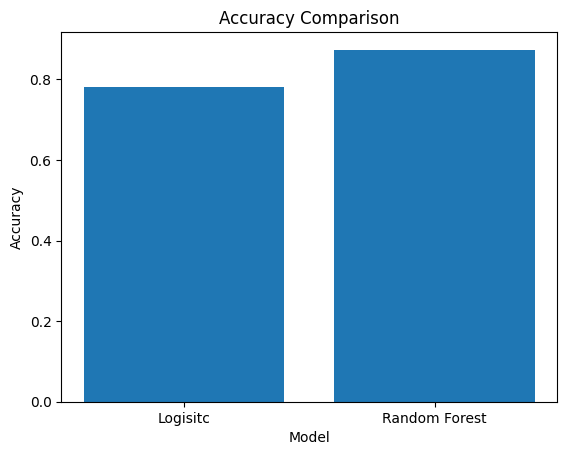

In [52]:
plt.bar(regression_metrics['Model'], regression_metrics['Accuracy'])

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')

plt.show()

# Clustering

In [53]:
df_clustering = df.copy()

In [54]:
df_clustering['name'] = encoder.fit_transform(df_clustering['name'])

In [55]:
df_clustering.head()

,name,year,quarter,prs_count,issues_count
0,102,2011,3,632,965.0
1,78,2011,3,484,560.0
2,92,2011,3,423,619.0
3,53,2011,3,367,694.0
4,52,2011,3,216,420.0


## Feature Scaling

In [56]:
features = df_clustering[['prs_count', 'issues_count']]

In [57]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

## Elbow method

In [ ]:
wcss = []
for num_of_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=num_of_clusters)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

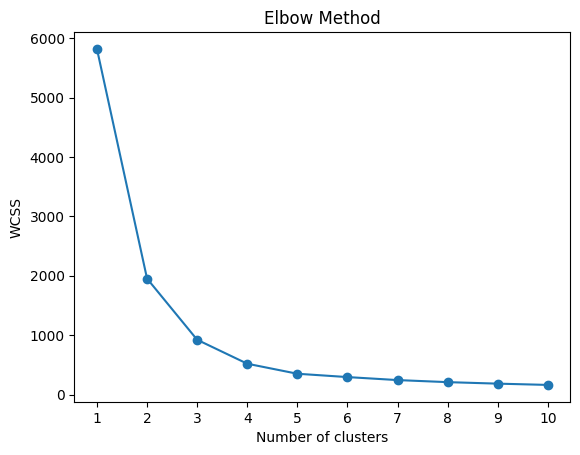

In [59]:
plt.plot(range(1, 11), wcss, marker='o')

plt.xticks(ticks = [*range(1, 11)])
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')

plt.show()

## Applying clustering

In [ ]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(scaled_features)

In [61]:
df_clustering['cluster'] = kmeans.labels_

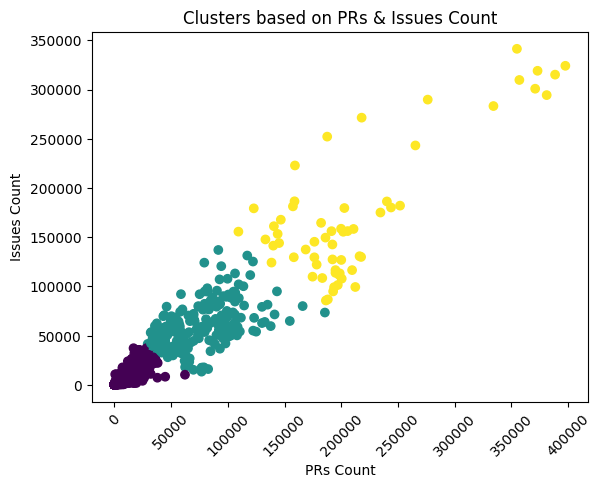

In [62]:
plt.scatter(df_clustering['prs_count'],
            df_clustering['issues_count'],
            c=df_clustering['cluster'])

plt.xticks(rotation = 45)
plt.xlabel('PRs Count')
plt.ylabel('Issues Count')
plt.title('Clusters based on PRs & Issues Count')

plt.show()